In [70]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/8_LinearModels/task_b.csv')
data=data.iloc[:,1:]

In [5]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [6]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [7]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [8]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

# Task 1

## 1.1 Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance

feature : f1 and coef value : 12787.166715968822
feature : f2 and coef value : 6283.424271327967
feature : f3 and coef value : 10233.919165404512


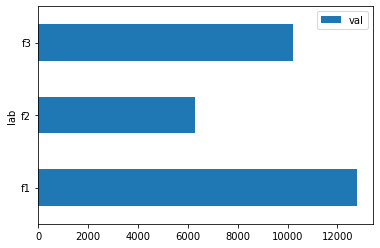

In [86]:
sgdclasif = SGDClassifier(loss='log').fit(X,Y)
#sgdclasif = LogisticRegression().fit(X,Y)
for i in zip(list(data.columns)[:-1],sgdclasif.coef_[0]):
  print('feature : {} and coef value : {}'.format(i[0],i[1]))
pd.DataFrame({'lab': list(data.columns)[:-1], 'val': sgdclasif.coef_[0]}).plot.barh(x='lab', y='val')



# 1.2 Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

feature : f1 and coef value : 8670.161776679559
feature : f2 and coef value : -7191.95040031213
feature : f3 and coef value : 10848.30066044209


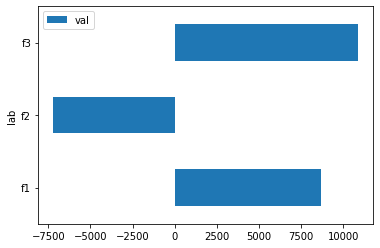

In [87]:
sgdclasif = SGDClassifier(loss='hinge').fit(X,Y)
#sgdclasif = SVC(kernel = 'linear').fit(X,Y)
for i in zip(list(data.columns)[:-1],sgdclasif.coef_[0]):
  print('feature : {} and coef value : {}'.format(i[0],i[1]))
pd.DataFrame({'lab': list(data.columns)[:-1], 'val': sgdclasif.coef_[0]}).plot.barh(x='lab', y='val')

# TASK 2

## 2.1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

In [88]:
standard = StandardScaler()
X_standardised = standard.fit_transform(X)

feature : f1 and coef value : -2.3200613351541195
feature : f2 and coef value : 2.513367724973972
feature : f3 and coef value : 13.369192046737732


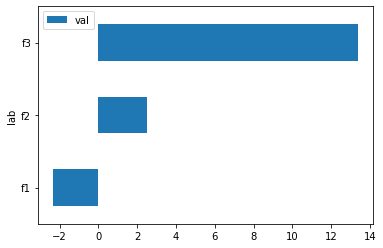

In [89]:
sgdclasif = SGDClassifier(loss='log').fit(X_standardised,Y)
#sgdclasif = LogisticRegression().fit(X_standardised,Y)
for i in zip(list(data.columns)[:-1],sgdclasif.coef_[0]):
  print('feature : {} and coef value : {}'.format(i[0],i[1]))
pd.DataFrame({'lab': list(data.columns)[:-1], 'val': sgdclasif.coef_[0]}).plot.barh(x='lab', y='val')

# 2.2 Apply SVM(SGDClassifier with hinge) on 'data' after standardization i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

feature : f1 and coef value : -0.3550622055733296
feature : f2 and coef value : -0.7781103158750325
feature : f3 and coef value : 10.882044939740938


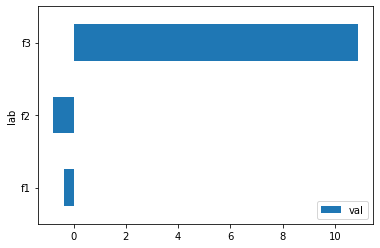

In [90]:
sgdclasif = SGDClassifier(loss='hinge').fit(X_standardised,Y)
#sgdclasif = SVC(kernel = 'linear').fit(X_standardised,Y)
for i in zip(list(data.columns)[:-1],sgdclasif.coef_[0]):
  print('feature : {} and coef value : {}'.format(i[0],i[1]))
pd.DataFrame({'lab': list(data.columns)[:-1], 'val': sgdclasif.coef_[0]}).plot.barh(x='lab', y='val')

# Observations
* When we have high variance in the data the coef values are high.
* when the values are standardised coef values also reduced in magnitude.
* when data have huge variance SVC takes lot of time to converge.